In [122]:
import pandas as pd
import numpy as np
import matplotlib as mpl
#setting display options to not show high values in scientific format (specifically for revenue)
pd.options.display.float_format = '{:.0f}'.format

In [135]:
data = pd.read_csv("TMDB_movie_dataset_v11.csv")

In [137]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934745 entries, 0 to 934744
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    934745 non-null  int64  
 1   title                 934734 non-null  object 
 2   vote_average          934745 non-null  float64
 3   vote_count            934745 non-null  int64  
 4   status                934745 non-null  object 
 5   release_date          850217 non-null  object 
 6   revenue               934745 non-null  int64  
 7   runtime               934745 non-null  int64  
 8   adult                 934745 non-null  bool   
 9   backdrop_path         275491 non-null  object 
 10  budget                934745 non-null  int64  
 11  homepage              101905 non-null  object 
 12  imdb_id               552498 non-null  object 
 13  original_language     934745 non-null  object 
 14  original_title        934734 non-null  object 
 15  

some variables have many missing values--others have no missing (budget, revenue, vote information) where I will need to check whether some of those need to be null instead (budget of $0 is unlikely, should not be used as a value). Things like tagline and homepage can be ignored, won't use those vars

In [138]:
data['revenue'].replace(0, np.nan, inplace=True)
data['budget'].replace(0, np.nan, inplace=True)
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934745 entries, 0 to 934744
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    934745 non-null  int64  
 1   title                 934734 non-null  object 
 2   vote_average          934745 non-null  float64
 3   vote_count            934745 non-null  int64  
 4   status                934745 non-null  object 
 5   release_date          850217 non-null  object 
 6   revenue               18737 non-null   float64
 7   runtime               934745 non-null  int64  
 8   adult                 934745 non-null  bool   
 9   backdrop_path         275491 non-null  object 
 10  budget                44462 non-null   float64
 11  homepage              101905 non-null  object 
 12  imdb_id               552498 non-null  object 
 13  original_language     934745 non-null  object 
 14  original_title        934734 non-null  object 
 15  

In [139]:
data.value_counts(['genres'])

genres                                   
Documentary                                  116926
Drama                                         95558
Comedy                                        53978
Animation                                     27334
Music                                         22859
                                              ...  
Drama, Thriller, Science Fiction, Horror          1
Drama, Thriller, Science Fiction, Fantasy         1
Drama, Thriller, Science Fiction, Comedy          1
Adventure, Fantasy, Action, History               1
Western, War, Thriller                            1
Name: count, Length: 12374, dtype: int64

genre needs to be split into list of genre tags.

In [140]:
genres = pd.DataFrame(data['genres'].str.split(',', expand=True).values)
genres['id'] = data['id']

only a few movies have more than 4 genres listed, so we will truncate the genres and only consider the first four for each film

In [141]:
genres = genres.drop(list(genres)[4:16], axis=1)
genres.columns = ['genre_1','genre_2','genre_3','genre_4','id']

In [142]:
genres.head()

,genre_1,genre_2,genre_3,genre_4,id
0,Action,Science Fiction,Adventure,None,27205
1,Adventure,Drama,Science Fiction,None,157336
2,Drama,Action,Crime,Thriller,155
3,Action,Adventure,Fantasy,Science Fiction,19995
4,Science Fiction,Action,Adventure,None,24428


In [143]:
data['genres'].head()

0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

In [144]:
genres.loc[5000]

genre_1           Animation
genre_2     Science Fiction
genre_3             Fantasy
genre_4              Action
id                   831405
Name: 5000, dtype: object

In [145]:
data['genres'].iloc[5000]

'Animation, Science Fiction, Fantasy, Action'

indices are matching, merging genres columns back into full dataset.

In [147]:
data = data.merge(genres, on='id')

In [148]:
data.iloc[325]

id                                                                 405774
title                                                            Bird Box
vote_average                                                            7
vote_count                                                           9227
status                                                           Released
release_date                                                   2018-12-13
revenue                                                               NaN
runtime                                                               124
adult                                                               False
backdrop_path                            /pDKFL1zcHzEpmz4MJA5JJnRbJeD.jpg
budget                                                           19800000
homepage                           https://www.netflix.com/title/80196789
imdb_id                                                         tt2737304
original_language                     

In [149]:
for i in range(10):
    print(data[['genres','genre_1','genre_2','genre_3','genre_4']].iloc[320+i])

genres     Action, Adventure, Science Fiction
genre_1                                Action
genre_2                             Adventure
genre_3                       Science Fiction
genre_4                                  None
Name: 320, dtype: object
genres     Horror, Drama, Thriller
genre_1                     Horror
genre_2                      Drama
genre_3                   Thriller
genre_4                       None
Name: 321, dtype: object
genres     Romance, Family, Animation, Fantasy
genre_1                                Romance
genre_2                                 Family
genre_3                              Animation
genre_4                                Fantasy
Name: 322, dtype: object
genres     Mystery, Drama, Crime
genre_1                  Mystery
genre_2                    Drama
genre_3                    Crime
genre_4                     None
Name: 323, dtype: object
genres     Action, Adventure, Comedy, Science Fiction
genre_1                                  

There are a great many listed with no revenue. Lots of reasons for this: international films, made-for-tv films, pay per view sports events, adult films, etc.
Removing: adult films, unreleased films, films with no reported revenue, films with 0 minute runtime (mostly foreign films and strange non-feature films anyway)

In [150]:
data = data[(data['adult'] == False)]
data = data[(data['status'] == 'Released')]
data = data[(data['revenue'] > 0)]
data = data[(data['runtime'] > 0)]

looking at release dates

In [151]:
data['release_date'] = pd.to_datetime(data['release_date'], format="%Y-%m-%d")

array([[<Axes: title={'center': 'release_date'}>]], dtype=object)

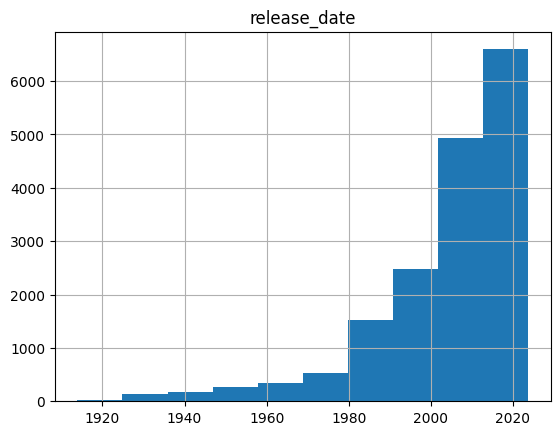

In [152]:
data.hist(["release_date"])

will remove movies with release dates after present day. will go back a few months to avoid including movies released in aug-oct 2023 that do not have full release windows to earn their final revenue. will also remove movies prior to 1960. Rationale: fewer instances, different theatrical release strategy, 1960s-70s was when the 'blockbuster' movie started and things looked more like they do now (streaming aside). 1950s were when television started to compete with film, and so film distribution strategy started to adapt.

In [153]:
data = data[(data['release_date'] < "2023-07-01")]
data = data[(data['release_date'] > "1960-01-01")]

Revenue and budget need to be adjusted for inflation to be more comparable over time

<Axes: xlabel='release_date', ylabel='revenue'>

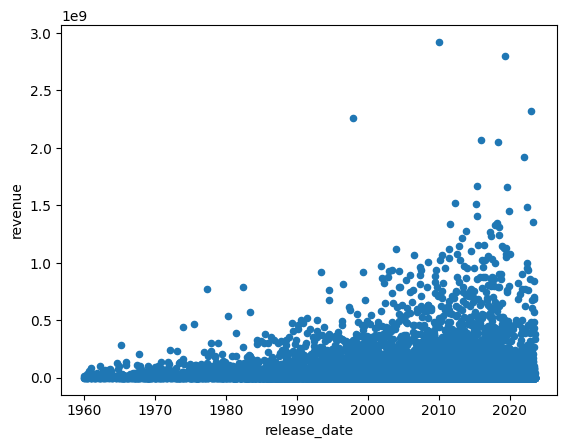

In [154]:
data.plot.scatter(x='release_date', y='revenue')

<Axes: xlabel='release_date', ylabel='budget'>

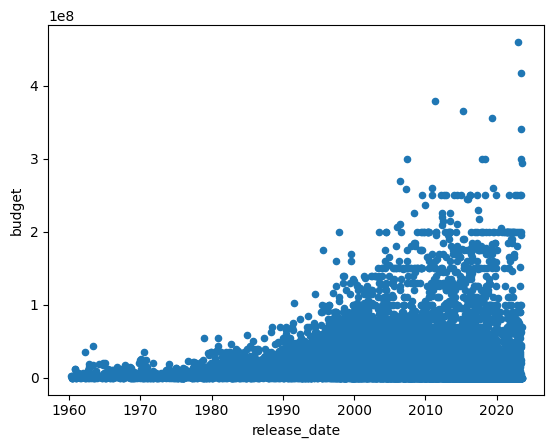

In [155]:
data.plot.scatter(x='release_date',y='budget')

inflation data retrieved from FRED (Federal Reserve Economic Data) from the St. Louis Fed (see references in proposal)

In [156]:
inflation_data = pd.read_csv('CPIAUCNS.csv')

renaming date column to match dataset for merging
converting date column to datetime format for merging
creating multiplier by indexing the inflation variable to the most recent row of inflation data.

In [157]:
inflation_data.head()
inflation_data = inflation_data.rename(columns={'DATE':'rounded_date'})
inflation_data['rounded_date'] = pd.to_datetime(inflation_data['rounded_date'], format="%Y-%m-%d")
inflation_data['inflation_multiplier'] = inflation_data['CPIAUCNS'].iloc[-1] / inflation_data['CPIAUCNS']

creating a rounded date variable set to the first of the month for merging with inflation dataset

In [158]:
from pandas.tseries.offsets import MonthBegin

data['rounded_date'] = pd.to_datetime(data['release_date']) - MonthBegin(1)

In [159]:
data = pd.merge(data, inflation_data, how='left', on='rounded_date')

In [160]:
data['adj_revenue'] = data['revenue'] * data['inflation_multiplier']
data['adj_budget'] = data['budget'] * data['inflation_multiplier']

<Axes: xlabel='release_date', ylabel='adj_revenue'>

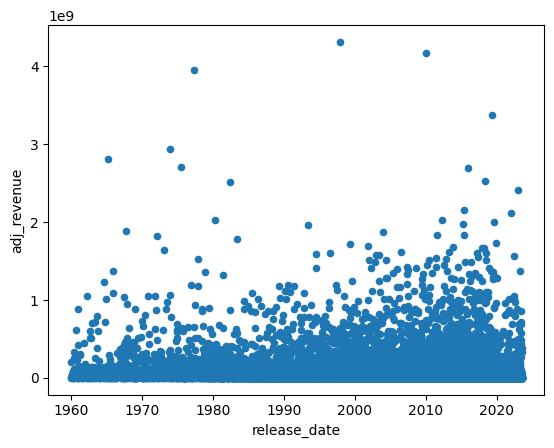

In [161]:
data.plot.scatter(x='release_date', y='adj_revenue')


<Axes: xlabel='release_date', ylabel='adj_budget'>

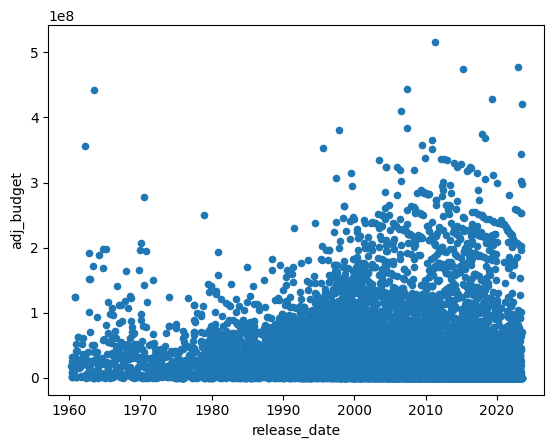

In [162]:
data.plot.scatter(x='release_date', y='adj_budget')

this has helped even out the distribution slightly. movies in recent years still make more money (and cost a lot more money) than in the 1960s-1970s, but at least it's in the same unit now.

In [163]:
data_clean = data.drop(columns=['status','adult','homepage','tagline','CPIAUCNS','rounded_date'])

In [164]:
data_clean

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,imdb_id,...,production_companies,production_countries,spoken_languages,genre_1,genre_2,genre_3,genre_4,inflation_multiplier,adj_revenue,adj_budget
0,27205,Inception,8,34495,2010-07-15,825532764,148,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,tt1375666,...,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",Action,Science Fiction,Adventure,None,1,1165491209,225888785
1,157336,Interstellar,8,32571,2014-11-05,701729206,169,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,tt0816692,...,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,Adventure,Drama,Science Fiction,None,1,914603498,215053864
2,155,The Dark Knight,9,30619,2008-07-16,1004558444,152,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,tt0468569,...,"DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",Drama,Action,Crime,Thriller,1,1405648374,258864928
3,19995,Avatar,8,29815,2009-12-15,2923706026,162,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,tt0499549,...,"Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",Action,Adventure,Fantasy,Science Fiction,1,4167116097,337792687
4,24428,The Avengers,8,29166,2012-04-25,1518815515,143,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,tt0848228,...,Marvel Studios,United States of America,"English, Hindi, Russian",Science Fiction,Action,Adventure,None,1,2031747869,294298107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16248,1155320,Wanderland,0,0,2007-01-12,100,8,NaN,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,152,152
16249,1076727,Alternate Spaces,0,0,2022-12-15,1,5,/n1BfBa0FkFiff9PoNWDHU2yJ9os.jpg,15,NaN,...,"Hobnob Studios, Screen and Film School",United Kingdom,NaN,Documentary,None,None,None,1,1,16
16250,750182,Short Circuit,0,0,2019-01-11,350000,126,NaN,210000,tt7662118,...,Twilight Productions,India,Gujarati,Science Fiction,Thriller,None,None,1,427974,256784
16251,692499,Destinos,0,0,2014-09-01,15000,88,/amopTb5aatOwD7cpTbuWtZpwCtA.jpg,250000,NaN,...,Cine de amigos,Colombia,Spanish,NaN,NaN,NaN,NaN,1,19411,323509


In [165]:
data_clean['genre_1'].value_counts()

genre_1
Drama              4024
Comedy             3463
Action             2078
Horror             1042
Adventure           706
Thriller            692
Documentary         622
Crime               620
Animation           608
Romance             512
Family              331
Science Fiction     306
Fantasy             297
Mystery             200
Music               197
War                 134
History              99
Western              75
TV Movie              7
Name: count, dtype: int64

removing the tv movies from analysis

In [166]:
data_clean

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,imdb_id,...,production_companies,production_countries,spoken_languages,genre_1,genre_2,genre_3,genre_4,inflation_multiplier,adj_revenue,adj_budget
0,27205,Inception,8,34495,2010-07-15,825532764,148,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,tt1375666,...,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",Action,Science Fiction,Adventure,None,1,1165491209,225888785
1,157336,Interstellar,8,32571,2014-11-05,701729206,169,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,tt0816692,...,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,Adventure,Drama,Science Fiction,None,1,914603498,215053864
2,155,The Dark Knight,9,30619,2008-07-16,1004558444,152,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,tt0468569,...,"DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",Drama,Action,Crime,Thriller,1,1405648374,258864928
3,19995,Avatar,8,29815,2009-12-15,2923706026,162,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,tt0499549,...,"Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",Action,Adventure,Fantasy,Science Fiction,1,4167116097,337792687
4,24428,The Avengers,8,29166,2012-04-25,1518815515,143,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,tt0848228,...,Marvel Studios,United States of America,"English, Hindi, Russian",Science Fiction,Action,Adventure,None,1,2031747869,294298107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16248,1155320,Wanderland,0,0,2007-01-12,100,8,NaN,100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,152,152
16249,1076727,Alternate Spaces,0,0,2022-12-15,1,5,/n1BfBa0FkFiff9PoNWDHU2yJ9os.jpg,15,NaN,...,"Hobnob Studios, Screen and Film School",United Kingdom,NaN,Documentary,None,None,None,1,1,16
16250,750182,Short Circuit,0,0,2019-01-11,350000,126,NaN,210000,tt7662118,...,Twilight Productions,India,Gujarati,Science Fiction,Thriller,None,None,1,427974,256784
16251,692499,Destinos,0,0,2014-09-01,15000,88,/amopTb5aatOwD7cpTbuWtZpwCtA.jpg,250000,NaN,...,Cine de amigos,Colombia,Spanish,NaN,NaN,NaN,NaN,1,19411,323509


In [167]:
data_clean.loc[data_clean['genre_1'] == ('TV Movie')]

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,imdb_id,...,production_companies,production_countries,spoken_languages,genre_1,genre_2,genre_3,genre_4,inflation_multiplier,adj_revenue,adj_budget
7451,15691,Doctor Who,6,195,1996-05-12,42000000,89,/26MVKVGQf1J0yrzJx97Ww4DLslV.jpg,5000000,tt0116118,...,"BBC Worldwide, Universal Television","Canada, United Kingdom, United States of America",English,TV Movie,Adventure,Science Fiction,None,2,82548774,9827235
12619,373332,Murder Town,7,11,2015-03-19,50604,91,/vrTbidKLu35LNqBeMeNgx9w5DT1.jpg,NaN,tt4419304,...,ORF,Austria,German,TV Movie,Crime,Drama,None,1,65964,NaN
13940,292136,Rock Sangkut,6,3,2014-07-30,100000,137,/hhwuLALcZLcRXpQABBzDXZzLST3.jpg,100000,NaN,...,"MW Entertainment Sdn Bhd, Astro",Malaysia,Malay,TV Movie,Drama,None,None,1,129187,129187
13972,905068,Christmas with The Chosen: The Messengers,7,3,2021-12-01,13728000,110,/flL1IWMnMuush1SVYapkKvQCmCg.jpg,NaN,tt15772866,...,Angel Studios,United States of America,NaN,TV Movie,Drama,History,Music,1,15201863,NaN
15110,450154,Bellator 175: Rampage vs. King Mo 2,7,1,2017-03-31,1033113,144,/9dC1bou5yrfZSr6Q6k6pEk879v3.jpg,1,NaN,...,"Bellator, Spike TV",United States of America,English,TV Movie,None,None,None,1,1304264,1
15421,866431,Islanders in the Creek 2: Lundy's Remorse,0,0,2021-08-27,6,99,NaN,1,NaN,...,NaN,NaN,NaN,TV Movie,None,None,None,1,7,1
15422,866430,Islanders in the Creek 2: Lundy's Revenge,0,0,2021-08-27,100,99,NaN,7,NaN,...,NaN,NaN,NaN,TV Movie,None,None,None,1,113,8
